# Demonstration of Automatic Data Processing

## Clean data set example

8/25/20

### Notebook setup and library imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# PVInsight Code Imports
from solardatatools import DataHandler
from solardatatools.algorithms import SoilingAnalysis
from solardatatools.dataio import get_pvdaq_data

ImportError: cannot import name 'SoilingAnalysis' from 'solardatatools.algorithms' (/Users/duncanr/opt/miniconda3/envs/pvi-user/lib/python3.7/site-packages/solardatatools/algorithms/__init__.py)

### Load data table from external source

For today's example, we're loading data from NREL's PVDAQ API, which is a publically available PV generatation data set. 

In [ ]:
data_frame = get_pvdaq_data(sysid=34, year=range(2011, 2015), api_key='DEMO_KEY')

[============================================================] 100.0% ...queries complete in 6.6 seconds       



### Running the `DataHandler` processing pipeline

In [ ]:
dh = DataHandler(data_frame)
dh.run_pipeline(power_col='ac_power')
dh.report()

total time: 10.64 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.83s
Cleaning                   0.21s
Filtering/Summarizing      7.61s
    Data quality           0.26s
    Clear day detect       0.24s
    Clipping detect        5.92s
    Capacity change detect 1.18s

Length:                4.00 years
Capacity estimate:     107.10 kW
Data sampling:         15 minute
Data quality score:    95.6%
Data clearness score:  55.4%
Inverter clipping:     False
Time shifts corrected: None
Time zone correction:  None


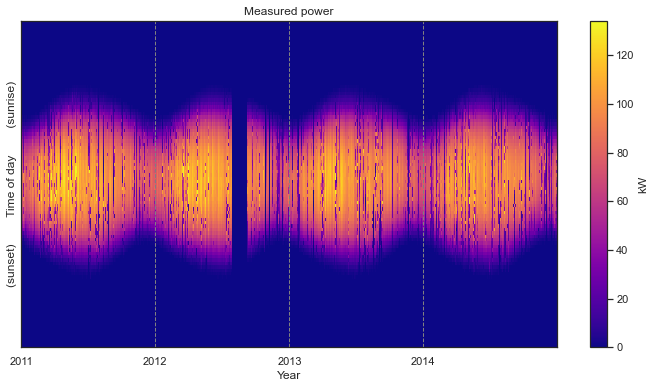

In [ ]:
dh.plot_heatmap(matrix='filled', scale_to_kw=True);

In [ ]:
sa = SoilingAnalysis(dh)

In [ ]:
sa.run()

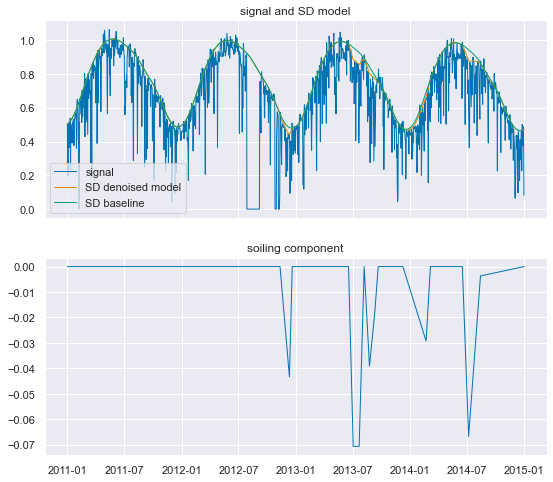

In [ ]:
sa.plot_analysis(figsize=(9, 8));